# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
banner id:          904096806
verification code:  2256361015dc

```

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 3114 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1000,2025-11-17 06:00:00,Campus,102,1.0,4.05,Credit,False
1,1003,2025-11-17 06:12:00,Campus,111,1.0,3.39,Credit,True
2,1002,2025-11-17 06:29:00,Suburb,113,1.0,4.13,Mobile,False
3,1004,2025-11-17 06:34:00,Suburb,108,3.0,7.47,Credit,True
4,1001,2025-11-17 06:42:00,Campus,102,1.0,4.39,Credit,False


In [2]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [3]:
# Task 1: use isna(), nunique(), min/max on timestamp

na_values = sales.isna().sum()
print("Missing Values by Column:")
print(na_values)

sold_products = sales["product_id"].nunique()
print("\nNumber of Product Types sold:")
print(sold_products)
print("Number of Products in Catalog:")
print(products["product_id"].nunique())

print("\nEarliest and Latest Transaction:")
sale_time = sales["timestamp"]
print(sale_time.min())
print(sale_time.max())

Missing Values by Column:
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          5
revenue           2
payment_method    0
loyalty_member    0
dtype: int64

Number of Product Types sold:
21
Number of Products in Catalog:
18

Earliest and Latest Transaction:
2025-11-17 06:00:00
2025-11-30 21:19:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [4]:
# Task 2: use pd.merge() with appropriate join type
merged_df = pd.merge(sales, products, on='product_id', how ='outer')
merged_df

,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1019,2025-11-17 07:36:00,Campus,101,1.0,2.56,Credit,True,Espresso,Coffee,1.2
1,1024,2025-11-17 08:11:00,Downtown,101,1.0,3.25,Credit,True,Espresso,Coffee,1.2
2,1037,2025-11-17 08:14:00,Campus,101,1.0,2.66,Mobile,False,Espresso,Coffee,1.2
3,1036,2025-11-17 08:22:00,Downtown,101,1.0,3.39,Credit,False,Espresso,Coffee,1.2
4,1051,2025-11-17 08:35:00,Downtown,101,1.0,3.40,Credit,False,Espresso,Coffee,1.2
...,...,...,...,...,...,...,...,...,...,...,...
3109,3919,2025-11-29 12:08:00,Suburb,199,1.0,1.59,Credit,False,NaN,NaN,NaN
3110,2481,2025-11-23 07:38:00,Campus,200,1.0,2.35,Credit,True,NaN,NaN,NaN
3111,2106,2025-11-21 10:24:00,Campus,201,1.0,2.70,Credit,False,NaN,NaN,NaN
3112,3681,2025-11-28 10:31:00,Downtown,201,1.0,5.47,Credit,True,NaN,NaN,NaN


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [5]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs
print(sales.shape)
print(merged_df.shape)
print("\nAdded Columns Missing Values:")
print(merged_df.loc[:,'name':'cost'].isna().sum())

print("\nProduct ID's 199, 200, and 201 are causing issues.")
problem_products = merged_df['product_id'] > 118
merged_df[problem_products]

(3114, 8)
(3114, 11)

Added Columns Missing Values:
name        14
category    14
cost        14
dtype: int64

Product ID's 199, 200, and 201 are causing issues.


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
3100,1343,2025-11-18 11:45:00,Downtown,199,1.0,2.91,Mobile,True,NaN,NaN,NaN
3101,1654,2025-11-19 13:36:00,Suburb,199,1.0,1.77,Mobile,True,NaN,NaN,NaN
3102,2108,2025-11-21 10:11:00,Campus,199,1.0,2.11,Cash,False,NaN,NaN,NaN
3103,2203,2025-11-21 13:44:00,Downtown,199,1.0,12.06,Mobile,True,NaN,NaN,NaN
3104,2534,2025-11-23 12:14:00,Campus,199,1.0,2.92,Credit,False,NaN,NaN,NaN
3105,2537,2025-11-23 12:16:00,Suburb,199,1.0,10.60,Credit,False,NaN,NaN,NaN
3106,2877,2025-11-25 08:23:00,Campus,199,1.0,2.73,Mobile,True,NaN,NaN,NaN
3107,2986,2025-11-25 12:46:00,Campus,199,1.0,3.39,Credit,False,NaN,NaN,NaN
3108,3622,2025-11-28 08:47:00,Campus,199,1.0,4.14,Mobile,False,NaN,NaN,NaN
3109,3919,2025-11-29 12:08:00,Suburb,199,1.0,1.59,Credit,False,NaN,NaN,NaN


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [6]:
# Task 4: create profit column, then groupby with .agg()
merged_df["profit"] = merged_df["revenue"] - (merged_df['cost'] * merged_df['quantity'])
cat_profits = merged_df.groupby('category')['profit'].agg(['sum','count']).sort_values("sum", ascending=False)
print(cat_profits)

              sum  count
category                
Sandwich  5266.24    736
Coffee    2748.55   1099
Pastry    1758.61    622
Tea        906.23    636


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [7]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()
loc_profits = merged_df.groupby(['category','location'])['profit'].agg(['sum','mean','count']).reset_index()
print(loc_profits)

    category  location      sum      mean  count
0     Coffee    Campus  1236.87  2.107104    587
1     Coffee  Downtown  1317.21  3.077593    428
2     Coffee    Suburb   194.47  2.315119     84
3     Pastry    Campus   685.30  2.421555    283
4     Pastry  Downtown   685.38  3.426900    200
5     Pastry    Suburb   387.93  2.790863    139
6   Sandwich    Campus   870.31  5.119471    170
7   Sandwich  Downtown  3255.97  8.391675    388
8   Sandwich    Suburb  1139.96  6.404270    178
9        Tea    Campus   220.90  1.200543    184
10       Tea  Downtown   271.47  1.729108    157
11       Tea    Suburb   413.86  1.402915    295


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

Text(0.5, 1.0, 'Total Profit by Product Category')

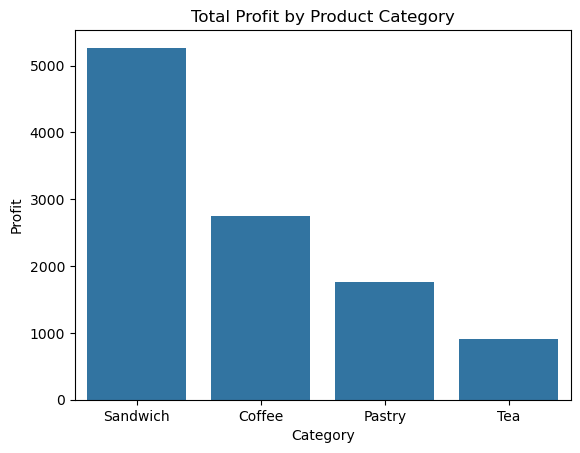

In [8]:
# Task 6: use sns.barplot() with aggregated data
plt = sns.barplot(data = merged_df.groupby('category')['profit'].sum().sort_values(ascending=False))
plt.set_xlabel('Category')
plt.set_ylabel('Profit')
plt.set_title('Total Profit by Product Category')

## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

1. You could accidently delete during the merge
2. You can learn more granular preference data, like coffee selling much better in dowtown or college areas than in suburban, as opposed to just seeing that coffee made the second most profit
3. Sandwiches have the highest proit margins, coffee sells well in areas with high pop densities(presumably), tea is both unpopular and has the lowest margins
4. Remove tea from the menu, it has the lowest total profit with $906.23 as well as a $1.24 lower margin in its most popular sales area than coffee.

## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

In [9]:
# Bonus: Your time-based analysis here
merged_df["day"] = merged_df['timestamp'].dt.day_name()
daily_profit = merged_df.groupby('day')['profit'].agg(['sum','count']).sort_values('sum',ascending=False)
profit_share = daily_profit.iloc[0,0] / daily_profit['sum'].sum()
print(profit_share*100)
daily_profit

21.179479064349604


,sum,count
day,,
Friday,2261.89,632
Thursday,1737.46,492
Monday,1709.29,493
Wednesday,1694.22,491
Tuesday,1636.25,488
Saturday,840.34,250
Sunday,800.18,247


### Your Findings

*Bonus findings here (state your question and what you discovered)*
Question: Is there a day of the week with standout profitability?

Yes, Friday has the highest profit by far with $2,261.89. This accounts for 21 percent of all weekly profit. The next highest day, Thursday, brings in over 500 dollars less profit than this.

## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.